# MISSING VALUES

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 300)
import warnings
warnings.filterwarnings('ignore')

In [365]:
df = pd.read_csv('Capstone_Cleaning.csv')
df.head()

,Unnamed: 0,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,co2_emission,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,warranty_,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
0,0,Audi A1,Sedans,15770,VAT deductible,56013.00,66.00,Used,Automatic,1422.00,Benzine,99.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Voice...","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,3.00,4.30,3.50,99.00,Cloth
1,1,Audi A1,Sedans,14500,Price negotiable,80000.00,141.00,Used,Automatic,1798.00,other_fuel,129.00,"Air conditioning,Automatic climate control,Hil...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats', 'Sport suspens...","['ABS', 'Central door lock', 'Central door loc...",7.00,2.00,No,NaN,5.00,7.10,4.70,129.00,Cloth
2,2,Audi A1,Sedans,14640,VAT deductible,83450.00,85.00,Used,Automatic,1598.00,Benzine,99.00,"Air conditioning,Cruise control,Electrical sid...","['MP3', 'On-board computer']","['Alloy wheels', 'Voice Control']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,3.00,4.40,3.40,99.00,Cloth
3,3,Audi A1,Sedans,14500,NaN,73000.00,66.00,Used,Automatic,1422.00,Benzine,99.00,"Air suspension,Armrest,Auxiliary heating,Elect...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport seats', 'Voice Control']","['ABS', 'Alarm system', 'Central door lock wit...",6.00,3.00,No,NaN,3.00,4.30,3.50,99.00,NaN
4,4,Audi A1,Sedans,16790,NaN,16200.00,66.00,Used,Automatic,1422.00,Benzine,109.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.00,No,NaN,4.00,4.60,3.80,109.00,Cloth


In [366]:
df.drop(['Unnamed: 0','co2_emission','warranty_'],axis=1,inplace=True)

In [367]:
df.head()

,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
0,Audi A1,Sedans,15770,VAT deductible,56013.00,66.00,Used,Automatic,1422.00,Benzine,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Voice...","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,3.00,4.30,3.50,99.00,Cloth
1,Audi A1,Sedans,14500,Price negotiable,80000.00,141.00,Used,Automatic,1798.00,other_fuel,"Air conditioning,Automatic climate control,Hil...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats', 'Sport suspens...","['ABS', 'Central door lock', 'Central door loc...",7.00,2.00,No,5.00,7.10,4.70,129.00,Cloth
2,Audi A1,Sedans,14640,VAT deductible,83450.00,85.00,Used,Automatic,1598.00,Benzine,"Air conditioning,Cruise control,Electrical sid...","['MP3', 'On-board computer']","['Alloy wheels', 'Voice Control']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,3.00,4.40,3.40,99.00,Cloth
3,Audi A1,Sedans,14500,NaN,73000.00,66.00,Used,Automatic,1422.00,Benzine,"Air suspension,Armrest,Auxiliary heating,Elect...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport seats', 'Voice Control']","['ABS', 'Alarm system', 'Central door lock wit...",6.00,3.00,No,3.00,4.30,3.50,99.00,NaN
4,Audi A1,Sedans,16790,NaN,16200.00,66.00,Used,Automatic,1422.00,Benzine,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.00,No,4.00,4.60,3.80,109.00,Cloth


In [368]:
df.isnull().sum()

make_model                0
body_type                60
price                     0
vat                    4513
km                     1024
hp                       88
type                      2
gearing_type              0
displacement            496
fuel                      0
comfort&convenience     920
entertainment&media    1374
extras                 2962
safety&security         982
gears                  4712
age_of_car             1597
Inspection                0
cons_comb              3759
cons_city              2436
cons_country           3335
co2_emission6          2454
Upholstery_Type        4871
dtype: int64

In [369]:
#body_type:make_model ile kırılım -other
#df.a.replace('k','Other',inplace=True)
#vat:make_model body_type ve age kırılımı-ffill
#km:araba yeni mi,yaşı,
#prev_owner  bfill-ffill
#type mode
#inspection_new nan yerine no
#warranty ffill ay veritipi float
#38 consumption bakılacak
#CO2_Emission:fill(df, 'make_model', 'Body_Type', 'CO2_Emission', 'median')
#emission_class :ffill make_model body_type price
#body_color ffil
#df["upholstery1"]=df.upholstery.str[0]
#df.upholstery1=df.upholstery1.str.split(",").str[0].str.replace("\n","")
#df["upholstery2"]=df.upholstery.str[0]
#df.upholstery2=df.upholstery2.str.split(",").str[1].str.replace("\n","")
#displacement:make_model bosy_type price (mean_median)
#41-42-43-44 fill
#47 gears make_model body_type price

### body_type

In [370]:
def fill_most(df, group_col, col_name) :
    for group in list(df[group_col].unique()) :
        cond = df[group_col] == group
        mode = list(df[cond][col_name].mode())
        if mode != [] :
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
    print('Number of NaN : ', df[col_name].isnull().sum())
    print('--------------------')
    print(df[col_name].value_counts(dropna = False))

In [371]:
fill_most(df,'make_model','body_type')

Number of NaN :  0
--------------------
Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [372]:
df.body_type.isnull().sum()

0

### vat

In [373]:
df.vat.ffill(inplace=True)

### age_of_car

In [374]:
df[df.km.isnull()][['age_of_car','km']]

,age_of_car,km
743,NaN,NaN
869,NaN,NaN
946,NaN,NaN
977,NaN,NaN
980,NaN,NaN
981,1.00,NaN
983,1.00,NaN
1038,NaN,NaN
1064,NaN,NaN
1075,1.00,NaN


In [375]:
df.age_of_car.replace(np.NaN,'-',inplace=True)

In [376]:
cond1 = (df.km < 10000)
cond2 = ((df.km >= 10000) & (df.km < 28000))
cond3 = ((df.km >= 28000) & (df.km < 50000))
cond4 = (df.km >= 5000)

In [377]:
df.loc[cond1, 'age_of_car'] = df.loc[cond1, 'age_of_car'].replace('-', 0)
df.loc[cond2, 'age_of_car'] = df.loc[cond2, 'age_of_car'].replace('-', 1)
df.loc[cond3, 'age_of_car'] = df.loc[cond3, 'age_of_car'].replace('-', 2)
df.loc[cond4, 'age_of_car'] = df.loc[cond4, 'age_of_car'].replace('-', 3)

In [378]:
df[df.km.isnull()][['age_of_car','km']]

,age_of_car,km
743,-,NaN
869,-,NaN
946,-,NaN
977,-,NaN
980,-,NaN
981,1.00,NaN
983,1.00,NaN
1038,-,NaN
1064,-,NaN
1075,1.00,NaN


In [379]:
df.groupby('age_of_car')['price'].mean()

age_of_car
0.0   22859.66
1.0   18460.04
2.0   15586.87
3.0   13639.08
-     23614.74
Name: price, dtype: float64

##### fill the "-" with 0 looks better when we check it with target

In [380]:
df.age_of_car.value_counts()

1.0    4528
3.0    3679
0.0    3597
2.0    3277
-       838
Name: age_of_car, dtype: int64

In [381]:
df.age_of_car.replace('-',0.0,inplace=True)

In [382]:
df.age_of_car.value_counts()

1.00    4528
0.00    4435
3.00    3679
2.00    3277
Name: age_of_car, dtype: int64

### km

In [383]:
cond_km1 = df[(df.km >= 10000) & (df.km < 28000)]['km'].mean()
cond_km2 = df[(df.km >= 28000) & (df.km < 50000)]['km'].mean()
cond_km3 = df[df.km >= 5000]['km'].median()                    # seems to includes outlier

In [384]:
for i in df.age_of_car:
    if i == 0.0:
        df.km.fillna(0,inplace=True)
    elif i == 1.0:
        df.km.fillna(cond_km1,inplace=True)
    elif i == 2.0:
        df.km.fillna(cond_km2,inplace=True)
    else :
        df.km.fillna(cond_km3,inplace=True)

In [385]:
df.km.isnull().sum()

0

### hp

In [386]:
df.hp.describe([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

count   15831.00
mean       88.37
std        26.84
min         1.00
0%          1.00
10%        55.00
20%        66.00
30%        70.00
40%        81.00
50%        85.00
60%        85.00
70%       100.00
80%       110.00
90%       122.00
95%       146.00
99%       165.00
max       294.00
Name: hp, dtype: float64

In [387]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
    elif method == "ffill":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [388]:
fill(df, 'make_model', 'body_type', 'hp', "median")

Number of NaN :  0
------------------
85.00     2543
66.00     2124
81.00     1404
100.00    1309
110.00    1112
70.00      890
125.00     707
51.00      695
55.00      570
118.00     550
92.00      466
121.00     395
147.00     380
77.00      353
56.00      314
54.00      276
103.00     259
87.00      232
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
1.00        20
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
120.00       8
104.00       8
112.00       7
191.00       7
155.00       6
117.00       6
184.00       5
65.00        4
90.00        4
76.00        4
168.00       3
98.00        3
149.00       3
80.00        3
93.00        3
167.00       2
228.00       2
53.00        2
143.00       2
150.00       2
140.00       2
270.00       2
63.00        2
40.00        2
12

In [389]:
df['hp'].isnull().sum()

0

### type

In [390]:
df.groupby('type')['price'].mean()

type
Demonstration    25774.39
Employee's car   18398.10
New              23769.29
Pre-registered   20743.06
Used             16238.80
Name: price, dtype: float64

In [391]:
df.type.fillna(df.type.mode()[0],inplace=True)

In [392]:
df.groupby('type')['price'].mean()

type
Demonstration    25774.39
Employee's car   18398.10
New              23769.29
Pre-registered   20743.06
Used             16239.77
Name: price, dtype: float64

In [393]:
df.type.isnull().sum()

0

### displacement

In [394]:
df.displacement

0        1422.00
1        1798.00
2        1598.00
3        1422.00
4        1422.00
5        1598.00
6        1598.00
7        1422.00
8        1598.00
9         999.00
10       1598.00
11       1395.00
12       1395.00
13       1395.00
14        999.00
15       1598.00
16       1598.00
17       1422.00
18        999.00
19       1598.00
20       1598.00
21       1395.00
22       1395.00
23       1598.00
24        999.00
25        999.00
26        999.00
27        999.00
28       1422.00
29        999.00
30       1422.00
31       1422.00
32        999.00
33       1422.00
34       1422.00
35        999.00
36        999.00
37       1422.00
38        999.00
39       1422.00
40        999.00
41       1422.00
42       1422.00
43       1422.00
44       1422.00
45        999.00
46       1422.00
47       1598.00
48        999.00
49        999.00
50       1422.00
51        999.00
52        999.00
53       1598.00
54       1422.00
55        999.00
56        999.00
57        999.00
58       1422.

In [395]:
fill(df,'make_model','body_type','displacement','median')

Number of NaN :  0
------------------
1598.00     5042
999.00      2466
1398.00     1334
1399.00      768
1229.00      677
1956.00      670
1461.00      652
1490.00      559
1422.00      467
1197.00      387
898.00       351
1395.00      321
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1357.00       53
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1984.00       18
1200.00       18
899.00        11
1397.00       11
160.00         6
929.00         5
1499.00        5
139.00         4
1596.00        4
900.00         4
997.00         4
1199.00        3
1396.00        3
1599.00        3
2.00           2
1300.00        2
995.00         2
1495.00        2
1608.00        2
1589.00        2
890.00         1
1995.00        1
54.00          1
1100.00        1
1333.00        1
1496.00        1
1580.00   

In [396]:
df.displacement.isnull().sum()

0

### co2_emission6

In [397]:
df['co2_emission6'].corr(df['price'])

0.32493092162713316

In [398]:
df.co2_emission6.isnull().sum()

2454

In [399]:
df.co2_emission6.describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

count   13465.00
mean      118.09
std        19.90
min        51.00
10%        97.00
20%       102.00
30%       106.00
40%       110.00
50%       116.00
60%       120.00
70%       126.00
80%       134.00
90%       143.00
95%       150.00
99%       172.00
max       990.00
Name: co2_emission6, dtype: float64

<AxesSubplot:xlabel='co2_emission6'>

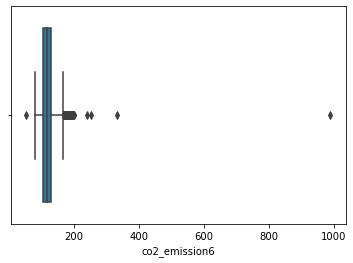

In [400]:
import seaborn as sns
sns.boxplot(x=df['co2_emission6'])

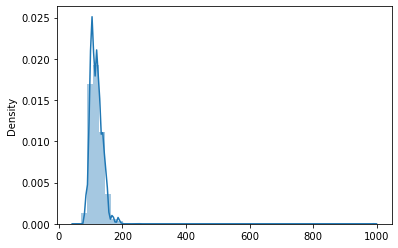

In [401]:
sns.distplot(x=df['co2_emission6'], kde=True);

In [402]:
fill(df,'make_model','body_type','co2_emission6','median')

Number of NaN :  0
------------------
120.00    850
119.00    700
102.00    689
104.00    679
106.00    619
99.00     545
97.00     538
124.00    516
140.00    513
103.00    445
107.00    418
114.00    395
113.00    395
108.00    362
125.00    340
133.00    332
128.00    331
118.00    314
130.00    298
110.00    289
117.00    285
126.00    282
85.00     275
127.00    257
111.00    237
109.00    234
139.00    224
129.00    213
105.00    202
135.00    202
92.00     198
123.00    188
150.00    174
112.00    171
143.00    171
95.00     161
116.00    158
141.00    156
98.00     151
136.00    145
137.00    133
134.00    130
145.00    126
149.00    117
153.00    113
147.00    109
101.00    105
132.00    100
115.00     86
122.00     83
121.00     82
138.00     77
93.00      66
131.00     61
168.00     58
142.00     58
90.00      54
148.00     48
144.00     40
154.00     40
94.00      37
146.00     36
100.00     36
151.00     34
186.00     32
91.00      31
152.00     28
187.00     26
82.00     

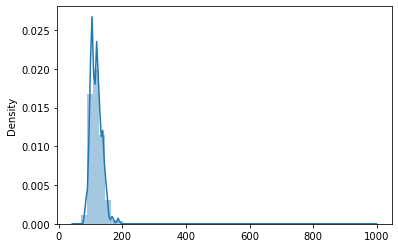

In [403]:
sns.distplot(x=df['co2_emission6'], kde=True);

### comfort&convenience  - entertainment&media  - extras  -- safety&security

In [404]:
list_ = ['comfort&convenience','entertainment&media','extras','safety&security']
for i in list_:
    fill(df,'make_model','body_type',i,'mode')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Number of NaN :  0
------------------
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio', 'USB']                                                                       1694
['Bluetooth', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                                                1063
['Bluetooth', 'CD player', 'Hands-free equipment', 'MP3', 'On-board computer', 'Radio', 'USB']                                                   1007
['On-board computer']                                                                                                                             681
['Radio']                                                                                                                                         558
['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio']                                                                               514
['On-board computer', 'Radio']                                

Number of NaN :  0
------------------
['Alloy wheels']                                                                                                                                                              5881
['Alloy wheels', 'Touch screen']                                                                                                                                               697
['Alloy wheels', 'Voice Control']                                                                                                                                              582
['Alloy wheels', 'Touch screen', 'Voice Control']                                                                                                                              544
['Roof rack']                                                                                                                                                                  538
['Alloy wheels', 'Roof rack']                                      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### gears

In [405]:
df['gears'].value_counts()

6.00     5822
5.00     3239
7.00     1908
8.00      224
9.00        6
1.00        2
3.00        2
4.00        2
2.00        1
50.00       1
Name: gears, dtype: int64

In [406]:
df.groupby('gears')['price'].mean()

gears
1.00    17495.00
2.00     9880.00
3.00    50432.00
4.00    50950.00
5.00    11827.59
6.00    19404.23
7.00    23254.57
8.00    29652.54
9.00    52208.50
50.00   10798.00
Name: price, dtype: float64

In [407]:
df['gears'].replace([9.0,1.0,3.0,4.0,2.0,50.0],8.0,inplace=True)

In [408]:
df.groupby('gears')['price'].mean()

gears
5.00   11827.59
6.00   19404.23
7.00   23254.57
8.00   30310.30
Name: price, dtype: float64

In [409]:
df['gears'] = df['gears'].astype('str')

### cons_comb

In [410]:
df.groupby(['make_model', 'body_type', 'cons_comb']).price.describe()

count     mean      std      min      25%      50%      75%      max
make_model     body_type     cons_comb                                                                      
Audi A1        Compact       3.00      123.00 15632.29  2409.16 10490.00 13895.00 15690.00 16684.50 23500.00
                             4.00      700.00 20181.19  4510.97  9950.00 16437.50 20288.00 22758.75 29197.00
                             5.00       72.00 18664.82  4214.01 12550.00 15850.00 16211.50 21115.00 28980.00
                             13.00       1.00 12990.00      NaN 12990.00 12990.00 12990.00 12990.00 12990.00
               Coupe         4.00        1.00 13950.00      NaN 13950.00 13950.00 13950.00 13950.00 13950.00
               Other         3.00        2.00 16900.00     0.00 16900.00 16900.00 16900.00 16900.00 16900.00
                             4.00        5.00 23428.00  4287.33 16590.00 21850.00 25900.00 25900.00 26900.00
                             5.00        1.00 23490.00      NaN 23490.00 23490.00 23490.00 23490.00 23490.00
               Sedans        3.00      407.00 15774.96  2065.25 10000.00 14465.00 15890.00 16890.00 21750.00
                             4.00      848.00 19767.60  4853.37  8999.00 15850.00 19550.00 22900.00 35900.00
                             5.00       50.00 18644.56  3148.51 11999.00 16082.50 18935.00 21415.00 23000.00
               Station wagon 3.00        7.00 15558.71   873.03 13999.00 15250.00 15850.00 16070.00 16422.00
                             4.00       11.00 18695.45  4359.32 12950.00 16185.00 17440.00 20795.00 28890.00
                             5.00        2.00 21489.00 10620.74 13979.00 17734.00 21489.00 25244.00 28999.00
Audi A2        Off-Road      4.00        1.00 28200.00      NaN 28200.00 28200.00 28200.00 28200.00 28200.00
Audi A3        Compact       3.00       40.00 16904.72  2309.49 12900.00 15000.00 16970.00 18112.50 23600.00
                             4.00       37.00 24337.35  8433.96 15950.00 18950.00 20550.00 29950.00 41495.00
                             5.00       37.00 14005.95  2025.22 13500.00 13500.00 13500.00 13500.00 24900.00
                             8.00        1.00 67600.00      NaN 67600.00 67600.00 67600.00 67600.00 67600.00
               Convertible   3.00        1.00 20900.00      NaN 20900.00 20900.00 20900.00 20900.00 20900.00
                             4.00        4.00 28337.50  5736.05 20000.00 27125.00 30200.00 31412.50 32950.00
                             5.00        2.00 16446.50  7853.84 10893.00 13669.75 16446.50 19223.25 22000.00
                             7.00        1.00 56100.00      NaN 56100.00 56100.00 56100.00 56100.00 56100.00
               Coupe         3.00        3.00 17326.67   583.12 16990.00 16990.00 16990.00 17495.00 18000.00
                             4.00        1.00 19000.00      NaN 19000.00 19000.00 19000.00 19000.00 19000.00
               Other         3.00        2.00 22500.00     0.00 22500.00 22500.00 22500.00 22500.00 22500.00
                             4.00        5.00 20598.00  4871.40 15300.00 18500.00 20200.00 20500.00 28490.00
                             5.00        1.00 18000.00      NaN 18000.00 18000.00 18000.00 18000.00 18000.00
               Sedans        1.00        3.00 37449.67  1361.64 35899.00 36949.50 38000.00 38225.00 38450.00
                             3.00      728.00 20492.80  4060.70 11990.00 16900.00 20850.00 23162.50 33800.00
                             4.00      727.00 21117.31  3761.05 12500.00 18700.00 20950.00 23480.00 38000.00
                             5.00      354.00 24025.77  2457.09 14900.00 22892.50 24288.00 25487.00 34738.00
                             6.00        3.00 36530.00 19453.24 25000.00 25300.00 25600.00 42295.00 58990.00
                             8.00       19.00 52746.79  9963.34 26900.00 49950.00 52000.00 57150.00 74600.00
               Station wagon 3.00       43.00 17530.77  4584.24 11790.00 13900.00 15990.00 19370.00 27225.00
       

In [411]:
df.cons_comb.value_counts()

4.00     4197
5.00     4134
3.00     2614
6.00     1044
7.00      136
8.00       29
1.00        4
13.00       1
9.00        1
Name: cons_comb, dtype: int64

In [412]:
cons_comb1 = (df.cons_city + df.cons_country) / 2
df.cons_comb = df.cons_comb.fillna(cons_comb1)

In [413]:
df.groupby('cons_comb')['price'].mean()

cons_comb
1.00    30012.25
3.00    14822.39
3.40    11578.95
3.60    16800.00
3.65    16210.00
3.90    20834.12
3.90    15000.00
3.95    15329.71
4.00    19504.12
4.05    22379.84
4.05    15214.69
4.10    19913.05
4.15    17808.86
4.20     8600.00
4.20    15387.69
4.35    10900.00
4.45    13719.00
4.55    11990.00
4.70    24085.43
5.00    16801.19
5.05    10200.00
5.15    20924.80
5.20    19738.00
5.20    16990.28
5.25    12098.45
5.30    15373.70
5.30    11135.71
5.35    25645.00
5.40    14500.00
5.45    10613.33
5.50    10620.00
5.55    16450.00
5.65    15690.00
5.80    14979.00
5.90    23900.00
5.95     9670.00
6.00    23789.66
6.25    21582.23
6.30    14610.00
6.30    21152.86
6.35    16999.01
6.40    24714.07
6.45    30260.57
6.45    13142.38
6.50    28705.00
7.00    36764.29
7.50    24922.00
7.55    18460.00
7.85    14990.00
8.00    46250.79
8.65    15458.00
9.00    12000.00
13.00   12990.00
Name: price, dtype: float64

In [414]:
df.cons_comb.value_counts()

4.00     4236
5.00     4134
3.00     2614
6.00     1044
4.10      261
5.25      233
4.15      140
7.00      136
6.35      131
4.05       88
5.30       56
6.45       55
5.15       40
5.20       39
3.60       37
4.05       32
6.25       31
8.00       29
4.70       23
6.30       21
3.65       20
3.40       19
3.90       17
6.40       14
4.20       13
6.30       10
5.30        7
3.95        7
6.45        7
5.20        6
1.00        4
6.50        4
7.50        3
5.05        3
8.65        3
5.45        3
5.35        2
5.50        2
5.95        2
7.55        2
5.40        1
4.35        1
3.90        1
5.65        1
5.90        1
9.00        1
4.20        1
5.80        1
5.55        1
4.55        1
4.45        1
7.85        1
13.00       1
Name: cons_comb, dtype: int64

In [415]:
df.cons_comb.replace([1.0,9.0, 13.0], np.nan, inplace = True)

In [416]:
fill(df,'make_model','body_type','cons_comb','median')

Number of NaN :  0
------------------
4.00    5460
5.00    5252
3.00    2633
6.00    1051
4.10     261
5.25     233
4.15     140
7.00     136
6.35     131
4.05      88
5.30      56
6.45      55
5.15      40
5.20      39
3.60      37
4.05      32
6.25      31
8.00      29
4.70      23
6.30      21
3.65      20
3.40      19
3.90      17
4.50      16
6.40      14
4.20      13
6.30      10
5.30       7
3.95       7
6.45       7
5.20       6
6.50       4
5.05       3
8.65       3
7.50       3
5.45       3
7.55       2
5.35       2
5.95       2
5.50       2
5.40       1
4.20       1
7.85       1
4.55       1
5.55       1
5.80       1
5.90       1
5.65       1
4.45       1
3.90       1
4.35       1
Name: cons_comb, dtype: int64


In [417]:
df.groupby('cons_comb')['price'].mean()

cons_comb
3.00   14777.28
3.40   11578.95
3.60   16800.00
3.65   16210.00
3.90   20834.12
3.90   15000.00
3.95   15329.71
4.00   19436.86
4.05   22379.84
4.05   15214.69
4.10   19913.05
4.15   17808.86
4.20    8600.00
4.20   15387.69
4.35   10900.00
4.45   13719.00
4.50   24048.06
4.55   11990.00
4.70   24085.43
5.00   16521.67
5.05   10200.00
5.15   20924.80
5.20   19738.00
5.20   16990.28
5.25   12098.45
5.30   15373.70
5.30   11135.71
5.35   25645.00
5.40   14500.00
5.45   10613.33
5.50   10620.00
5.55   16450.00
5.65   15690.00
5.80   14979.00
5.90   23900.00
5.95    9670.00
6.00   23851.87
6.25   21582.23
6.30   14610.00
6.30   21152.86
6.35   16999.01
6.40   24714.07
6.45   30260.57
6.45   13142.38
6.50   28705.00
7.00   36764.29
7.50   24922.00
7.55   18460.00
7.85   14990.00
8.00   46250.79
8.65   15458.00
Name: price, dtype: float64

### cons_city

In [418]:
df.groupby('cons_city')['price'].mean()

cons_city
0.00    19479.50
1.00    10420.00
3.00    12268.22
3.30    10199.83
3.40    14955.54
3.50     9231.46
3.60    13915.00
3.70    10078.66
3.80    11444.58
3.90    12289.64
4.00    12855.95
4.10    22945.48
4.20    16647.91
4.30    17231.22
4.40    16104.93
4.50    16610.38
4.60    16707.68
4.70    17061.70
4.80    15766.82
4.90    14930.26
5.00    18419.20
5.10    22770.93
5.20    18003.17
5.30    19826.08
5.40    18512.17
5.50    20269.25
5.60    19462.86
5.70    17121.72
5.80    20430.11
5.90    22817.59
6.00    21403.06
6.10    25019.26
6.20    22560.18
6.30    13381.17
6.40    20748.48
6.50    13229.40
6.60    11004.43
6.70    11383.79
6.80    15457.25
6.90    16635.73
7.00    18262.43
7.10    20257.90
7.20    12831.79
7.30    18283.64
7.40    17755.07
7.50    20704.49
7.60    22940.42
7.70    21269.71
7.80    16964.17
7.90    16511.07
8.00    20820.62
8.10    26632.32
8.20    19634.86
8.30    27751.15
8.40    21818.57
8.50    23164.82
8.60    25741.00
8.70    31556.17
8.80

In [419]:
fill(df,'make_model','body_type','cons_city','median')

Number of NaN :  0
------------------
5.00     943
7.30     736
5.10     709
4.60     706
5.80     638
6.30     590
4.50     580
5.90     560
5.70     560
6.70     556
4.30     553
6.80     549
7.20     535
7.80     416
5.40     400
6.60     356
4.20     353
7.00     349
5.20     345
4.10     320
4.70     311
4.00     300
7.50     267
7.10     258
6.00     251
7.60     248
3.90     245
6.90     235
3.50     230
5.50     216
6.20     211
7.70     204
7.40     179
6.50     162
8.70     161
6.10     152
8.20     140
4.40     137
6.40     121
8.00     110
5.60     105
7.90     101
5.30     101
4.80      72
4.90      58
3.70      53
3.40      50
9.60      42
8.60      42
8.30      41
8.50      39
9.20      34
10.00     33
3.30      30
3.80      26
8.10      25
10.20     21
11.30     19
9.90      15
9.40      14
5.65      13
9.10      12
3.00       9
5.25       8
8.40       7
0.00       6
9.80       5
8.90       4
62.00      4
11.00      4
11.50      4
11.20      4
10.80      3
9.50       3


In [420]:
df.groupby('cons_city')['price'].mean()

cons_city
0.00    19479.50
1.00    10420.00
3.00    12268.22
3.30    10199.83
3.40    14955.54
3.50     9231.46
3.60    13915.00
3.70    10078.66
3.80    11444.58
3.90    12289.64
4.00    12855.95
4.10    22945.48
4.20    16647.91
4.30    16916.63
4.40    16111.39
4.50    16610.38
4.60    17975.28
4.70    17165.50
4.80    15766.82
4.90    14930.26
5.00    18729.84
5.10    24747.83
5.20    18003.17
5.25    19977.50
5.30    19826.08
5.40    18395.39
5.50    20269.25
5.60    19348.45
5.65    27324.54
5.70    16412.01
5.80    20445.41
5.90    20564.39
6.00    21403.06
6.10    25019.26
6.20    22560.18
6.30    12414.32
6.40    20748.48
6.50    13229.40
6.60    10994.67
6.70    10852.32
6.80    14851.61
6.90    16230.59
7.00    19702.56
7.10    20257.90
7.20    12388.40
7.30    19017.36
7.40    17755.07
7.50    20704.49
7.60    22940.42
7.70    21269.71
7.80    17083.40
7.90    16511.07
8.00    20820.62
8.10    26632.32
8.20    19634.86
8.30    27751.15
8.40    21818.57
8.50    23164.82
8.60

### cons_country

In [421]:
df.groupby('cons_country')['price'].mean()

cons_country
2.80    21433.33
2.90    20848.00
3.10    11047.51
3.20    11168.77
3.30    12214.26
3.40    14832.10
3.50    15823.17
3.60    16500.29
3.70    18864.86
3.80    17814.22
3.90    18661.50
4.10    18406.65
4.20    17893.66
4.30    16123.11
4.40    21026.24
4.50    15199.08
4.60    17356.58
4.70    19109.12
4.80    17156.11
4.90    17797.23
5.10    21521.88
5.20    24814.17
5.30    25058.67
5.40    18892.30
5.50    28448.69
5.60    27887.81
5.70    25736.14
5.80    29079.97
5.90    26185.00
6.10    18390.00
6.30    36141.21
6.40    48703.27
6.50    48125.00
6.60    47580.47
6.70    15220.50
6.90    22900.00
7.10    31370.00
7.30    18317.75
7.60    32995.00
7.70    31495.00
7.80    12050.00
8.60    11700.00
10.30   12990.00
Name: price, dtype: float64

In [422]:
fill(df,'make_model','body_type','cons_country','median')

Number of NaN :  0
------------------
3.70     1746
4.20     1643
4.50     1217
4.40     1188
3.80     1097
3.90     1030
4.70     1025
4.60      774
4.30      596
4.10      592
4.80      564
3.50      525
3.60      486
4.90      481
3.10      481
3.30      457
3.40      353
5.30      281
5.40      239
5.10      232
5.70      204
3.20      200
5.60      154
5.20      117
6.30       52
5.50       36
5.80       30
7.70       20
6.60       19
2.90       16
6.40       15
2.80        9
4.00        8
5.15        5
7.30        4
6.50        4
3.85        3
7.10        3
6.70        2
6.10        2
5.90        2
7.80        2
6.90        2
10.30       1
8.60        1
7.60        1
Name: cons_country, dtype: int64


In [423]:
df.groupby('cons_country')['price'].mean()

cons_country
2.80    21433.33
2.90    20848.00
3.10    11047.51
3.20    10905.17
3.30    12214.26
3.40    14832.10
3.50    15823.17
3.60    16500.29
3.70    19390.72
3.80    17263.33
3.85    19832.67
3.90    18819.96
4.00    19977.50
4.10    18406.65
4.20    16779.59
4.30    15680.75
4.40    22983.62
4.50    13967.96
4.60    18476.05
4.70    19620.75
4.80    14882.12
4.90    17797.23
5.10    21521.88
5.15    28833.80
5.20    24814.17
5.30    25148.75
5.40    18892.30
5.50    28448.69
5.60    27887.81
5.70    25736.14
5.80    29079.97
5.90    26185.00
6.10    18390.00
6.30    36141.21
6.40    48703.27
6.50    48125.00
6.60    47580.47
6.70    15220.50
6.90    22900.00
7.10    31370.00
7.30    18317.75
7.60    32995.00
7.70    31495.00
7.80    12050.00
8.60    11700.00
10.30   12990.00
Name: price, dtype: float64

In [424]:
df.drop(['cons_city','cons_country'],axis=1,inplace=True)

### Upholstery_Type

In [425]:
df['Upholstery_Type'].value_counts()

Cloth           8423
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

In [426]:
df.groupby(['Upholstery_Type'])[['price']].mean()

,price
Upholstery_Type,
Cloth,16914.74
Full leather,27613.98
Part leather,21655.83
Velour,18073.47
alcantara,23183.60


In [427]:
df['Upholstery_Type'].replace(['Velour','alcantara'],'Part leather',inplace=True)

In [428]:
df.groupby(['Upholstery_Type'])[['price']].mean()

,price
Upholstery_Type,
Cloth,16914.74
Full leather,27613.98
Part leather,21576.71


In [429]:
fill(df, 'make_model', 'body_type', 'Upholstery_Type', 'ffill')

Number of NaN :  0
------------------
Cloth           12182
Part leather     2286
Full leather     1451
Name: Upholstery_Type, dtype: int64


In [430]:
df.groupby(['Upholstery_Type'])[['price']].mean()

,price
Upholstery_Type,
Cloth,16437.60
Full leather,26605.70
Part leather,21002.20


### END

In [431]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
hp                     0
type                   0
gearing_type           0
displacement           0
fuel                   0
comfort&convenience    0
entertainment&media    0
extras                 0
safety&security        0
gears                  0
age_of_car             0
Inspection             0
cons_comb              0
co2_emission6          0
Upholstery_Type        0
dtype: int64

In [432]:
df.to_csv('Capston_Missing_Values.csv')